In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<AxesSubplot:xlabel='Species', ylabel='PetalWidthCm'>

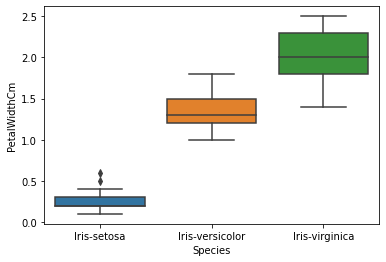

In [5]:
sns.boxplot(x="Species",y="PetalWidthCm",data=df)

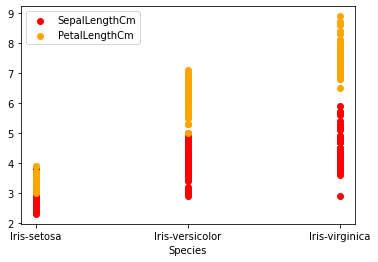

In [61]:
plt.scatter(x=df['Species'],y=df["SepalLengthCm"]-2,color="red",label="SepalLengthCm")
plt.scatter(x=df['Species'],y=df["PetalLengthCm"]+2,color="orange",label="PetalLengthCm")
plt.xlabel("Species")
plt.legend()
plt.show()

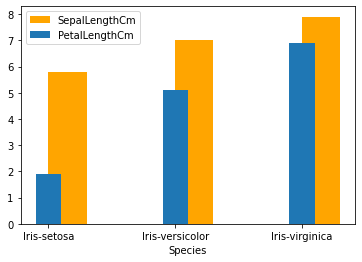

In [55]:
# fig=plt.figure(figsize=(150,5))
plt.bar(df['Species'],df["SepalLengthCm"],0.3 ,color="orange",align='edge',label="SepalLengthCm")
plt.bar(df['Species'],df["PetalLengthCm"],0.2,align='center',label="PetalLengthCm")
plt.xlabel("Species")
plt.legend()

plt.show()

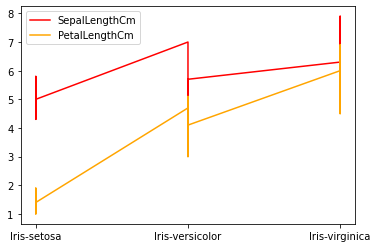

In [54]:
plt.plot(df['Species'],df["SepalLengthCm"],color="red",label="SepalLengthCm")
plt.plot(df['Species'],df["PetalLengthCm"],color="orange",label="PetalLengthCm")
plt.legend()

### Data Standardization

In [4]:
x=df.iloc[:,[1,2,3,4]].values
y=df.iloc[:,[5]].values

In [5]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler().fit_transform(x)

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
component=pca.fit_transform(x)
component

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

### KMeans Algorithm

In [10]:
global_error=[]
new_k=[]
def KMeans_Clustering(data,k,repeat):
    global global_error
    sm_error_list=[]
    total_error=[]
    centroids={}
    global new_k
    new_k.append(k)
    error=0
    
    for i in range(k):
        centroids[i]=data[i]
    
    for i in range(repeat):
        
        clusters=calculate_clusters(data,centroids,k)        
        centroids=calculate_centroids(centroids,clusters,k)
        
        print("here",len(clusters))
        print("there",len(centroids))
        for j in range(k):
                            
            x=clusters[j]
            y=centroids[j]
            print("y",y)
            
            for p in x:
                print("p",p)
                error+=round(np.linalg.norm(y-p),2)
                print(error)
    sm_error_list.append(error)
    error=0
    total_error.append(sum((sm_error_list)))
    print("toal_error",*total_error)
    global_error.append(sum((sm_error_list)))
    
    print("global_error",*global_error)
#     elbowplot(new_k,global_error)
    
#     print(total_error)
        
#         plot_clusters(centroids,clusters,k)
def K_Kmeans_Clustering(data,k ,repeat):
    centroids={}
    for i in range(k):
        centroids[i]=data[i]
    for j in range(repeat):
        clusters=calculate_clusters(data,centroids,k)
        centroids=calculate_centroids(centroids,clusters,k)
        plot_clusters(centroids,clusters,k)
        
def calculate_clusters(data,centroids,k):
    # cluster dictionary
    clusters={}
    for i in range(k):
        clusters[i]=[]
    
    for x in data:
        euclid_dist=[]
        for i in range(k):
            # eucliden distance between every data points and centroids 
            euclid_dist.append(round(np.linalg.norm(centroids[i]-x),2))
            # then appending data in minimum value index
            clusters[euclid_dist.index(min(euclid_dist))].append(x)
    return clusters

def calculate_centroids(centroids,clusters,k):
    for i in range(k):
        # here new centroids are calculated by averaging previous centroids 
        centroids[i]=np.average(clusters[i],axis=0)
    return centroids

def plot_clusters(centroids, clusters, k):
    """ Plots the clusters with centroid and specified graph attributes """ 
    colors = ['red', 'blue' , 'green', 'orange', 'blue', 'gray', 'yellow', 'purple']
    plt.figure(figsize = (6, 4))  
    area = (20) ** 2
    for i in range(k):
        for cluster in clusters[i]:
            plt.scatter(cluster[0], cluster[1], c=colors[i % k], alpha=0.6)          
        plt.scatter(centroids[i][0], centroids[i][1], c='black', s=200)
def elbowplot(new_k,total_error):
    full_error=[]
    
    for i in total_error:
        if i>=0:
            full_error.append(-i)
    print(full_error)
    print(new_k)
    plt.plot(new_k, full_error, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
        
        
        

In [11]:
new_k=[]
global_error=[]

for i in range(1,3):    
    avg=KMeans_Clustering(component,i,2)
    


here 1
there 1
y [ 4.14483263e-16 -5.72134932e-16]
p [-2.68420713  0.32660731]
2.7
p [-2.71539062 -0.16955685]
5.42
p [-2.88981954 -0.13734561]
8.31
p [-2.7464372  -0.31112432]
11.07
p [-2.72859298  0.33392456]
13.82
p [-2.27989736  0.74778271]
16.22
p [-2.82089068 -0.08210451]
19.04
p [-2.62648199  0.17040535]
21.669999999999998
p [-2.88795857 -0.57079803]
24.61
p [-2.67384469 -0.1066917 ]
27.29
p [-2.50652679  0.65193501]
29.88
p [-2.61314272  0.02152063]
32.49
p [-2.78743398 -0.22774019]
35.29
p [-3.22520045 -0.50327991]
38.55
p [-2.64354322  1.1861949 ]
41.449999999999996
p [-2.38386932  1.34475434]
44.19
p [-2.6225262   0.81808967]
46.94
p [-2.64832273  0.31913667]
49.61
p [-2.19907796  0.87924409]
51.98
p [-2.58734619  0.52047364]
54.62
p [-2.3105317   0.39786782]
56.959999999999994
p [-2.54323491  0.44003175]
59.53999999999999
p [-3.21585769  0.14161557]
62.75999999999999
p [-2.30312854  0.10552268]
65.07
p [-2.35617109 -0.03120959]
67.42999999999999
p [-2.50791723 -0.13905634]


In [9]:
new_k=[]
global_error=[]

for i in range(1,5):    
    avg=KMeans_Clustering(component,i,2)
    

here 1
there 1
y [ 0. -0.]
p [-2.68420713  0.32660731]
2.7
p [-2.71539062 -0.16955685]
5.42
p [-2.88981954 -0.13734561]
8.31
p [-2.7464372  -0.31112432]
11.07
p [-2.72859298  0.33392456]
13.82
p [-2.27989736  0.74778271]
16.22
p [-2.82089068 -0.08210451]
19.04
p [-2.62648199  0.17040535]
21.669999999999998
p [-2.88795857 -0.57079803]
24.61
p [-2.67384469 -0.1066917 ]
27.29
p [-2.50652679  0.65193501]
29.88
p [-2.61314272  0.02152063]
32.49
p [-2.78743398 -0.22774019]
35.29
p [-3.22520045 -0.50327991]
38.55
p [-2.64354322  1.1861949 ]
41.449999999999996
p [-2.38386932  1.34475434]
44.19
p [-2.6225262   0.81808967]
46.94
p [-2.64832273  0.31913667]
49.61
p [-2.19907796  0.87924409]
51.98
p [-2.58734619  0.52047364]
54.62
p [-2.3105317   0.39786782]
56.959999999999994
p [-2.54323491  0.44003175]
59.53999999999999
p [-3.21585769  0.14161557]
62.75999999999999
p [-2.30312854  0.10552268]
65.07
p [-2.35617109 -0.03120959]
67.42999999999999
p [-2.50791723 -0.13905634]
69.94
p [-2.469056    0.

here 3
there 3
y [0.83 0.  ]
p [-2.68420713  0.32660731]
813.800000000001
p [-2.71539062 -0.16955685]
817.3500000000009
p [-2.88981954 -0.13734561]
821.070000000001
p [-2.7464372  -0.31112432]
824.660000000001
p [-2.72859298  0.33392456]
828.230000000001
p [-2.27989736  0.74778271]
831.4300000000011
p [-2.82089068 -0.08210451]
835.0800000000011
p [-2.62648199  0.17040535]
838.5400000000011
p [-2.88795857 -0.57079803]
842.3000000000011
p [-2.67384469 -0.1066917 ]
845.8100000000011
p [-2.50652679  0.65193501]
849.2100000000011
p [-2.61314272  0.02152063]
852.6500000000011
p [-2.78743398 -0.22774019]
856.2700000000011
p [-3.22520045 -0.50327991]
860.3600000000012
p [-2.64354322  1.1861949 ]
864.0300000000011
p [-2.38386932  1.34475434]
867.5100000000011
p [-2.6225262   0.81808967]
871.0600000000011
p [-2.64832273  0.31913667]
874.5500000000011
p [-2.19907796  0.87924409]
877.7000000000011
p [-2.58734619  0.52047364]
881.1600000000011
p [-2.3105317   0.39786782]
884.3300000000011
p [-2.543

here 4
there 4
y [1.01 0.02]
p [-2.68420713  0.32660731]
1059.759999999999
p [-2.71539062 -0.16955685]
1063.489999999999
p [-2.88981954 -0.13734561]
1067.3899999999992
p [-2.7464372  -0.31112432]
1071.1599999999992
p [-2.72859298  0.33392456]
1074.9099999999992
p [-2.27989736  0.74778271]
1078.279999999999
p [-2.82089068 -0.08210451]
1082.109999999999
p [-2.62648199  0.17040535]
1085.749999999999
p [-2.88795857 -0.57079803]
1089.6899999999991
p [-2.67384469 -0.1066917 ]
1093.3799999999992
p [-2.50652679  0.65193501]
1096.9499999999991
p [-2.61314272  0.02152063]
1100.569999999999
p [-2.78743398 -0.22774019]
1104.379999999999
p [-3.22520045 -0.50327991]
1108.649999999999
p [-2.64354322  1.1861949 ]
1112.4899999999989
p [-2.38386932  1.34475434]
1116.129999999999
p [-2.6225262   0.81808967]
1119.849999999999
p [-2.64832273  0.31913667]
1123.519999999999
p [-2.19907796  0.87924409]
1126.839999999999
p [-2.58734619  0.52047364]
1130.4699999999991
p [-2.3105317   0.39786782]
1133.8099999999

/home/sayantan/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/home/sayantan/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [46]:
import math
o=[4.14483263e-16, -5.72134932e-16]
t=[-2.71539062 ,-0.16955685]
s=math.dist(o,t)
s

2.720679279989817

In [43]:
new_k

[1, 2]

[-858.8258910341955, -1419.8226111254764, -1936.4474425416663, -2419.8750330050893, -2860.0850828546213, -3262.8845480517525, -3652.6970861381974]
[1, 2, 3, 4, 5, 6, 7]


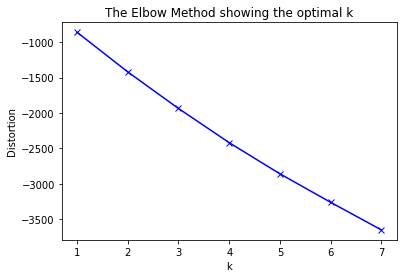

In [29]:
elbowplot(new_k,global_error)

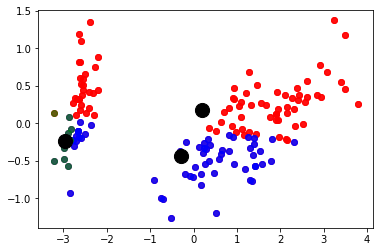

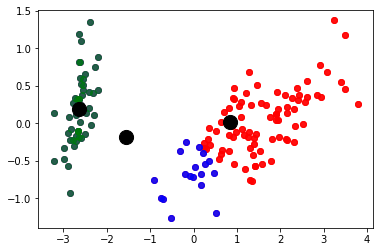

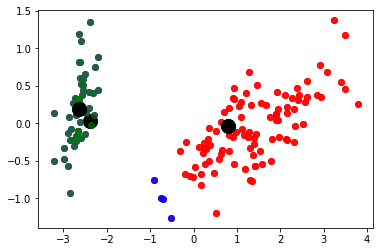

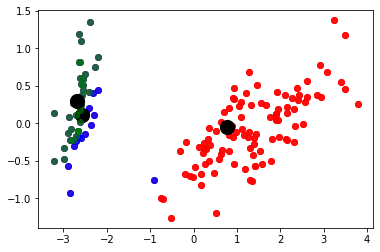

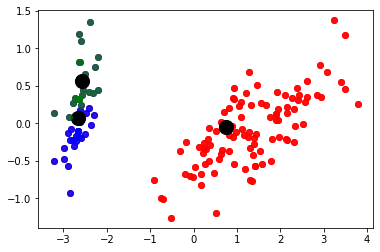

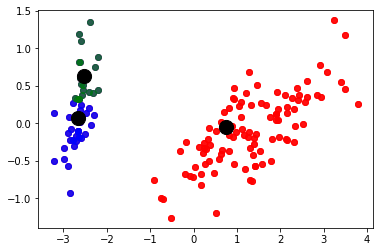

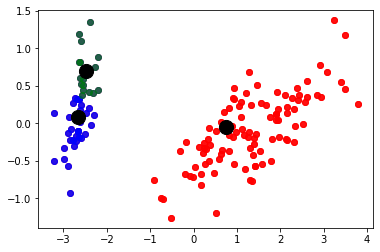

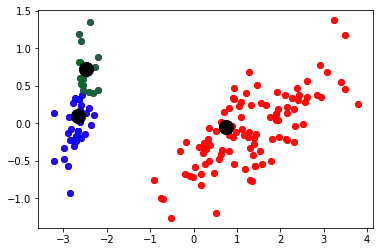

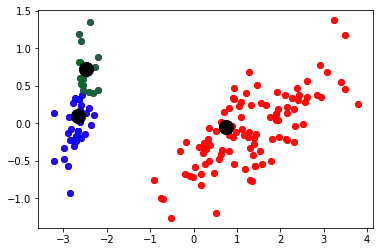

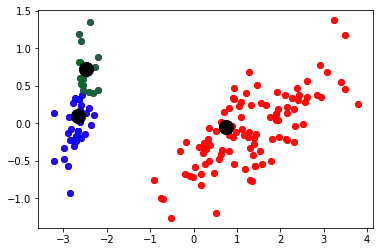

In [29]:
K_Kmeans_Clustering(component,3,10)

### Z-SCORE

In [12]:
def Z_score(df):
    a=list(df.columns)
    a=a[:len(a)-1]
    z=[]
    for i in a:
        meanx=df[i].mean()
        stdx=df[i].std()
        ans=(df[i]-meanx)/stdx
        z.append(ans)
    x=pd.DataFrame(z)
    return x


In [15]:
x=Z_score(df)

In [16]:
x

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
Id,-1.714797,-1.691780,-1.668762,-1.645745,-1.622728,-1.599710,-1.576693,-1.553675,-1.530658,-1.507641,...,1.507641,1.530658,1.553675,1.576693,1.599710,1.622728,1.645745,1.668762,1.691780,1.714797
SepalLengthCm,-0.897674,-1.139200,-1.380727,-1.501490,-1.018437,-0.535384,-1.501490,-1.018437,-1.743017,-1.139200,...,1.034539,1.276066,-0.052331,1.155302,1.034539,1.034539,0.551486,0.793012,0.430722,0.068433
SepalWidthCm,1.028611,-0.124540,0.336720,0.106090,1.259242,1.951133,0.797981,0.797981,-0.355171,0.106090,...,0.106090,0.106090,-0.816431,0.336720,0.567351,-0.124540,-1.277692,-0.124540,0.797981,-0.124540
PetalLengthCm,-1.336794,-1.336794,-1.393470,-1.280118,-1.336794,-1.166767,-1.336794,-1.280118,-1.336794,-1.280118,...,1.043591,0.760212,0.760212,1.213619,1.100267,0.816888,0.703536,0.816888,0.930239,0.760212
PetalWidthCm,-1.308593,-1.308593,-1.308593,-1.308593,-1.308593,-1.046525,-1.177559,-1.308593,-1.308593,-1.439627,...,1.574155,1.443121,0.918985,1.443121,1.705189,1.443121,0.918985,1.050019,1.443121,0.787951


## Standard Deviation

In [7]:
x=df.iloc[:,[1,2,3,4]].values
# it given mean of columns
miu=x.mean()
n=len(x)
a=sum((x-miu)**2)
ans=a/n
res=ans**(1/2)
res


array([2.51871707, 0.59546406, 1.7831012 , 2.38930043])

### Covariance

In [88]:
def Cov(x, y,n):
    a=(sum (x - np.mean(x)) * (y - np.mean(y)) ) * 1/(n-1)
    return a

In [89]:
import numpy as np
n=150
res=Cov(df['PetalLengthCm'].values,df['PetalWidthCm'].values,150)

In [90]:
res

array([-3.36343431e-16, -3.36343431e-16, -3.36343431e-16, -3.36343431e-16,
       -3.36343431e-16, -2.68984934e-16, -3.02664183e-16, -3.36343431e-16,
       -3.36343431e-16, -3.70022680e-16, -3.36343431e-16, -3.36343431e-16,
       -3.70022680e-16, -3.70022680e-16, -3.36343431e-16, -2.68984934e-16,
       -2.68984934e-16, -3.02664183e-16, -3.02664183e-16, -3.02664183e-16,
       -3.36343431e-16, -2.68984934e-16, -3.36343431e-16, -2.35305685e-16,
       -3.36343431e-16, -3.36343431e-16, -2.68984934e-16, -3.36343431e-16,
       -3.36343431e-16, -3.36343431e-16, -3.36343431e-16, -2.68984934e-16,
       -3.70022680e-16, -3.36343431e-16, -3.70022680e-16, -3.36343431e-16,
       -3.36343431e-16, -3.70022680e-16, -3.36343431e-16, -3.36343431e-16,
       -3.02664183e-16, -3.02664183e-16, -3.36343431e-16, -2.01626436e-16,
       -2.68984934e-16, -3.02664183e-16, -3.36343431e-16, -3.36343431e-16,
       -3.36343431e-16, -3.36343431e-16,  6.78075543e-17,  1.01486803e-16,
        1.01486803e-16,  

### PCA

In [8]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [55]:
# standarization of dataset
from sklearn.preprocessing import StandardScaler
standard=StandardScaler().fit_transform(x)
standard

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [45]:
#covarience matrix
features = standard.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

<AxesSubplot:>

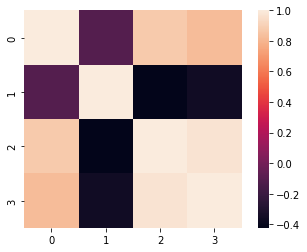

In [47]:
# heatmap of cov_matrix
sns.heatmap(cov_matrix,vmax=1,square=True)

In [60]:
# eigen vales and vectors 
s,u = np.linalg.eig(cov_matrix)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

(array([2.93035378, 0.92740362, 0.14834223, 0.02074601]),
 array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
        [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
        [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
        [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]]))

Text(0.5, 0, 'Dimensions')

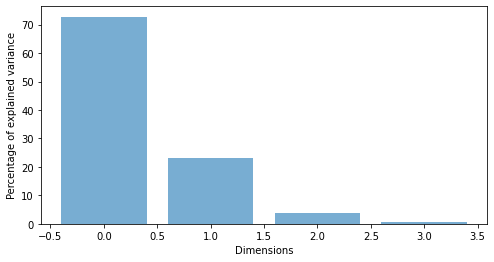

In [61]:
#in which direction we get the higest varience 
explained_variance=(eig_values / np.sum(eig_values))*100
plt.figure(figsize=(8,4))
plt.bar(range(4), explained_variance, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

In [69]:
# first 2 variance cover almost 96% of dataset so we take those two
explained_variance


array([72.77045209, 23.03052327,  3.68383196,  0.51519268])

In [70]:

projected_1 = standard.dot(eig_vectors.T[0])
projected_2 = standard.dot(eig_vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res

,PC1,PC2,Y
0,2.264542,-0.505704,Iris-setosa
1,2.086426,0.655405,Iris-setosa
2,2.367950,0.318477,Iris-setosa
3,2.304197,0.575368,Iris-setosa
4,2.388777,-0.674767,Iris-setosa
...,...,...,...
145,-1.870522,-0.382822,Iris-virginica
146,-1.558492,0.905314,Iris-virginica
147,-1.520845,-0.266795,Iris-virginica
148,-1.376391,-1.016362,Iris-virginica
